# Convergence analysis for Newmark standing mode (wsol)
Load `convergence.csv`, inspect the data, and visualize L2/H1 errors vs time step and mesh size.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_theme(style="whitegrid")

In [17]:
csv_path = Path('/home/ghi/Documents/HPC-PoliMi/NMPDE/labs/wave-equation/results/newmark-standing-mode-wsol/convergence.csv')
df = pd.read_csv(csv_path)
df.head()

,h,N_el_x,N_el_y,r,dt,T,method,rel_L2_error_avg,rel_H1_error_avg
0,0.05,20,20,1,0.050,1,newmark-standing-mode-wsol,0.747248,3.609684
1,0.05,20,20,1,0.010,1,newmark-standing-mode-wsol,0.333607,2.420447
2,0.05,20,20,1,0.005,1,newmark-standing-mode-wsol,0.487454,2.791799
3,0.05,20,20,2,0.050,1,newmark-standing-mode-wsol,1.584046,7.349293
4,0.05,20,20,2,0.010,1,newmark-standing-mode-wsol,0.208401,3.929375


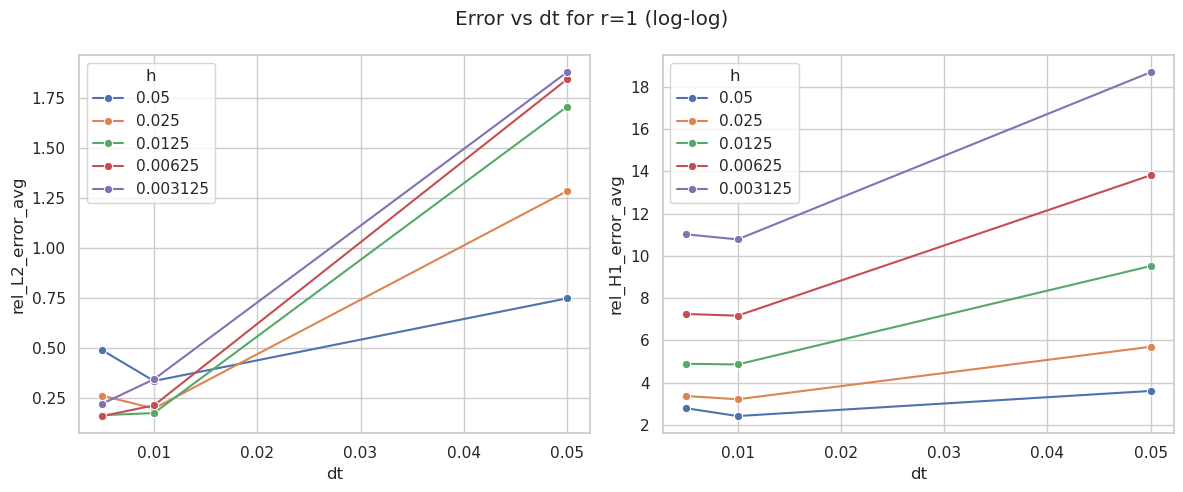

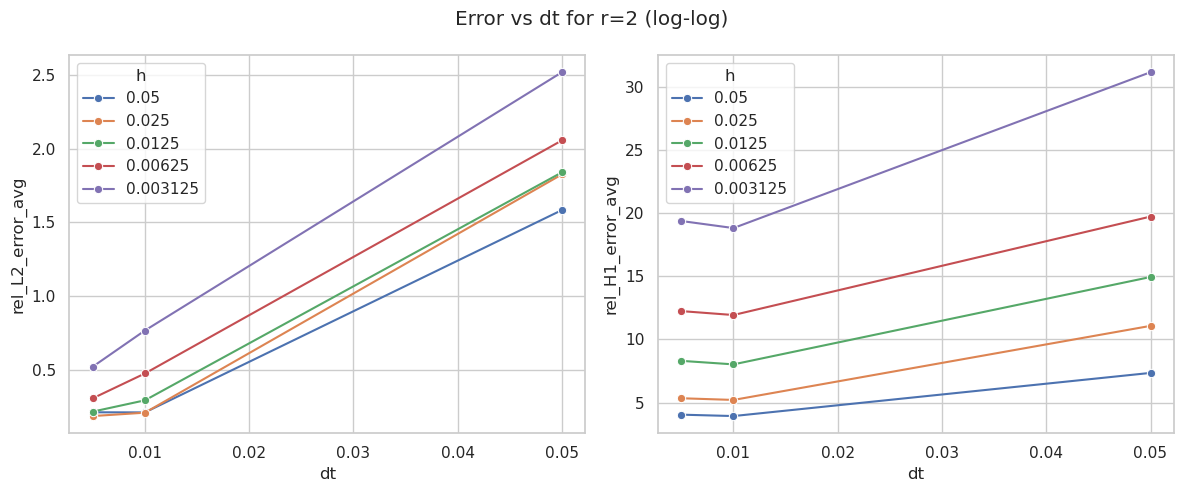

In [18]:
# Errors vs dt separated by r using seaborn
figs = []
for r_val in sorted(df['r'].unique()):
    sub = df[df['r'] == r_val].copy()
    sub['h_label'] = sub['h'].astype(str)
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)
    sns.lineplot(data=sub, x='dt', y='rel_L2_error_avg', hue='h_label', marker='o', ax=axes[0])
    sns.lineplot(data=sub, x='dt', y='rel_H1_error_avg', hue='h_label', marker='o', ax=axes[1])
    # for ax, ylabel in zip(axes, ['rel_L2_error_avg', 'rel_H1_error_avg']):
    #     ax.set_xscale('log'); ax.set_yscale('log')
    #     ax.set_xlabel('dt'); ax.set_ylabel(ylabel)
    axes[0].legend(title='h'); axes[1].legend(title='h')
    fig.suptitle(f'Error vs dt for r={r_val} (log-log)')
    plt.tight_layout()
    figs.append(fig)

/tmp/ipykernel_106657/2922173873.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best_dt = df.groupby(['h', 'r']).apply(lambda g: g.loc[g['dt'].idxmin()]).reset_index(drop=True)


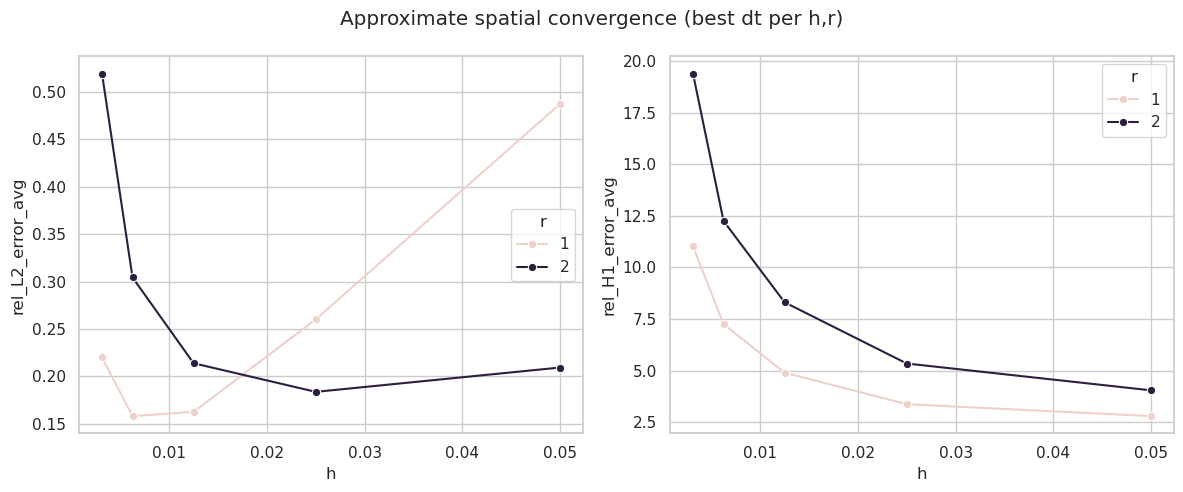

In [19]:
# Spatial convergence: pick smallest dt per (h, r) to approximate spatial error using seaborn
best_dt = df.groupby(['h', 'r']).apply(lambda g: g.loc[g['dt'].idxmin()]).reset_index(drop=True)
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)
sns.lineplot(data=best_dt, x='h', y='rel_L2_error_avg', hue='r', marker='o', ax=axes[0])
sns.lineplot(data=best_dt, x='h', y='rel_H1_error_avg', hue='r', marker='o', ax=axes[1])
# for ax, ylabel in zip(axes, ['rel_L2_error_avg', 'rel_H1_error_avg']):
#     ax.set_xscale('log'); ax.set_yscale('log')
#     ax.set_xlabel('h'); ax.set_ylabel(ylabel)
axes[0].legend(title='r'); axes[1].legend(title='r')
fig.suptitle('Approximate spatial convergence (best dt per h,r)');
plt.tight_layout()

# Convergence analysis for Theta standing mode (wsol)
Load `convergence.csv`, inspect the data, and visualize L2/H1 errors vs time step and mesh size.

In [20]:
csv_path_theta = Path('/home/ghi/Documents/HPC-PoliMi/NMPDE/labs/wave-equation/results/theta-standing-mode-wsol/convergence.csv')
df_theta = pd.read_csv(csv_path_theta)
df_theta.head()

,h,N_el_x,N_el_y,r,dt,T,method,rel_L2_error_avg,rel_H1_error_avg
0,0.05,20,20,1,0.050,1,theta-standing-mode-wsol,0.291048,2.496489
1,0.05,20,20,1,0.010,1,theta-standing-mode-wsol,0.292929,2.468021
2,0.05,20,20,1,0.005,1,theta-standing-mode-wsol,0.299699,2.436349
3,0.05,20,20,2,0.050,1,theta-standing-mode-wsol,0.186331,3.954081
4,0.05,20,20,2,0.010,1,theta-standing-mode-wsol,0.181709,3.850360


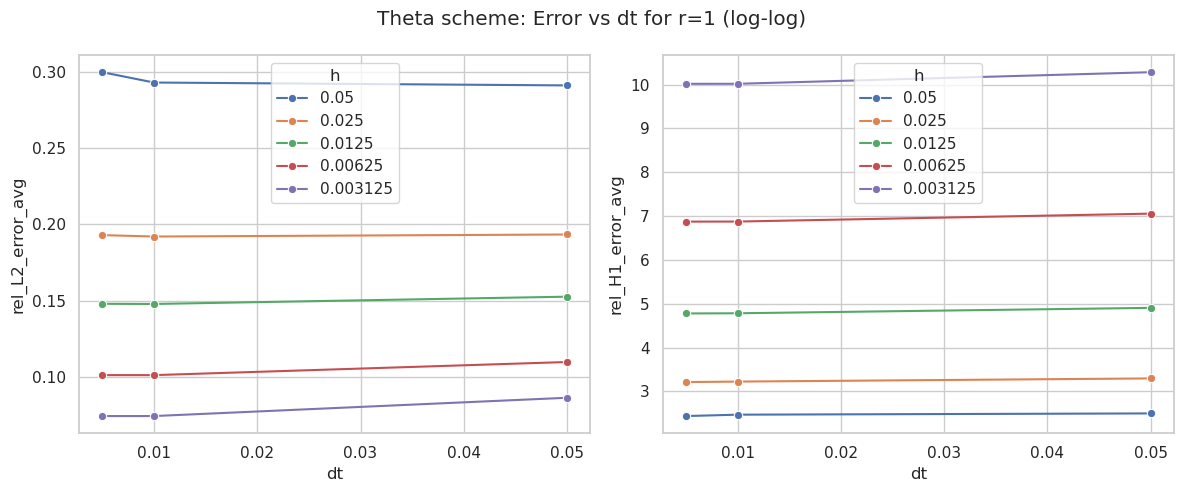

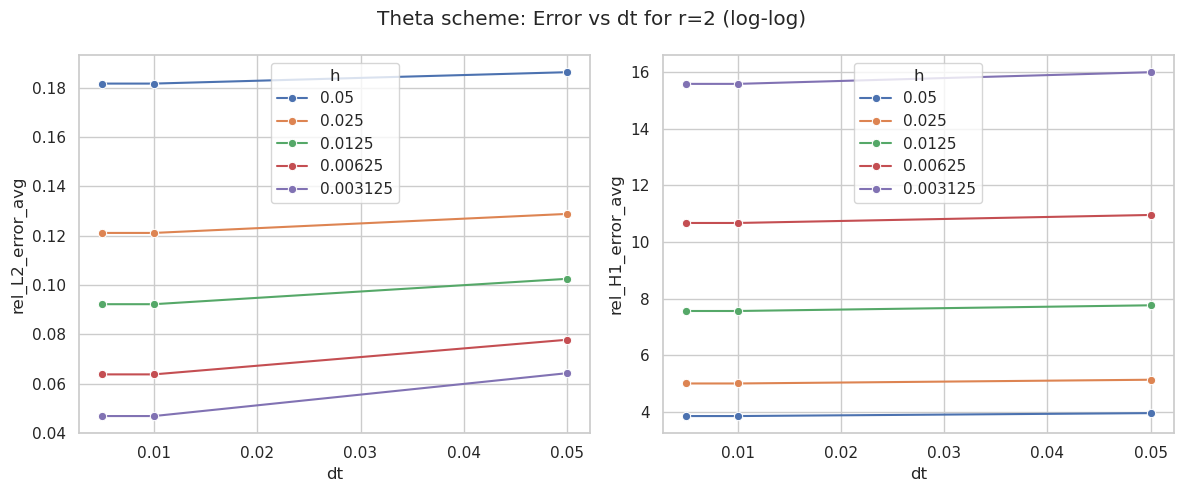

In [21]:
# Errors vs dt separated by r for theta scheme using seaborn
figs_theta = []
for r_val in sorted(df_theta['r'].unique()):
    sub = df_theta[df_theta['r'] == r_val].copy()
    sub['h_label'] = sub['h'].astype(str)
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)
    sns.lineplot(data=sub, x='dt', y='rel_L2_error_avg', hue='h_label', marker='o', ax=axes[0])
    sns.lineplot(data=sub, x='dt', y='rel_H1_error_avg', hue='h_label', marker='o', ax=axes[1])
    # for ax, ylabel in zip(axes, ['rel_L2_error_avg', 'rel_H1_error_avg']):
    #     ax.set_xscale('log'); ax.set_yscale('log')
    #     ax.set_xlabel('dt'); ax.set_ylabel(ylabel)
    axes[0].legend(title='h'); axes[1].legend(title='h')
    fig.suptitle(f'Theta scheme: Error vs dt for r={r_val} (log-log)')
    plt.tight_layout()
    figs_theta.append(fig)

/tmp/ipykernel_106657/410883640.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best_dt_theta = df_theta.groupby(['h', 'r']).apply(lambda g: g.loc[g['dt'].idxmin()]).reset_index(drop=True)


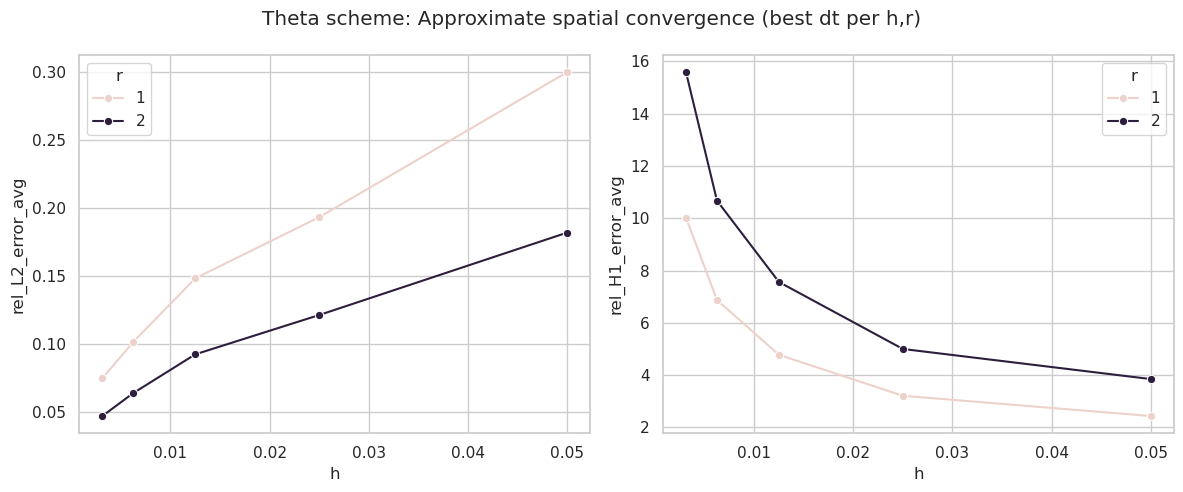

In [22]:
# Spatial convergence for theta: pick smallest dt per (h, r) to approximate spatial error using seaborn
best_dt_theta = df_theta.groupby(['h', 'r']).apply(lambda g: g.loc[g['dt'].idxmin()]).reset_index(drop=True)
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)
sns.lineplot(data=best_dt_theta, x='h', y='rel_L2_error_avg', hue='r', marker='o', ax=axes[0])
sns.lineplot(data=best_dt_theta, x='h', y='rel_H1_error_avg', hue='r', marker='o', ax=axes[1])
# for ax, ylabel in zip(axes, ['rel_L2_error_avg', 'rel_H1_error_avg']):
#     ax.set_xscale('log'); ax.set_yscale('log')
#     ax.set_xlabel('h'); ax.set_ylabel(ylabel)
axes[0].legend(title='r'); axes[1].legend(title='r')
fig.suptitle('Theta scheme: Approximate spatial convergence (best dt per h,r)');
plt.tight_layout()